In [ ]:
!pip3 install essentia

     |████████████████████████████████| 12.0 MB 157 kB/s 


In [ ]:
!pip3 install madmom

     |████████████████████████████████| 20.0 MB 1.1 MB/s 
     |████████████████████████████████| 51 kB 6.9 MB/s 
  Created wheel for madmom: filename=madmom-0.16.1-cp37-cp37m-linux_x86_64.whl size=20934155 sha256=c09d66776ab3893eb00115dadec79bf4c402eeeae33baba816cab45c652b6b3a
  Stored in directory: /root/.cache/pip/wheels/af/90/61/393ceef814b55b12d1b59b5ed3a2b2a3457a55d39b7363b975
Successfully built madmom


In [ ]:
!pip3 install mir_eval

     |████████████████████████████████| 87 kB 4.0 MB/s 
  Created wheel for mir-eval: filename=mir_eval-0.6-py3-none-any.whl size=96514 sha256=1b13c5a39434526ddbcdae6a5f9dab543ebf907e17370598fec09e3906fe4dcd
  Stored in directory: /root/.cache/pip/wheels/08/28/2d/006dbad29550bac8daf049ff34fa882655a7d3e77f3b67595e
Successfully built mir-eval


The section below is all path dependent

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
root = 'drive/MyDrive/Bass/'

import pandas as pd
import sys
sys.path.append(root)

Mounted at /content/drive


In [ ]:
import madmom

In [ ]:
!ls 'drive/MyDrive/Bass'

In [ ]:
# TODO 1 optimise imports
from essentia.standard import *
from essentia import Pool, array
import essentia.standard as es
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd
import pandas as pd
import os

import IPython
import pickle
from pickle import load
from scipy.signal import find_peaks
import ipywidgets as widgets
from scipy import signal
from lxml import etree

import plotly.express as px
import scipy
from statistics import *

In [ ]:
import mir_eval
from mir_eval import *

In [ ]:
!ls drive/MyDrive/Bass/statistics

In [ ]:
deviatePath = 'drive/MyDrive/Bass/deviations/billieJean_iec_stem.csv'
col_list = ["onset dev", "offset dev"]
df = pd.read_csv(deviatePath, usecols=col_list)
onset_dev_list = df["onset dev"]
offset_dev_list = df["offset dev"] 

In [ ]:
statsPath = 'drive/MyDrive/Bass/data/bjean/StudentStatistics_blend_billieJeanscaled.csv'
statsCols = ["Student","precision","recall","f_measure_value","Onset ABS Mean","Onset Mean","Onset Std","Duration ABS Mean","Duration Mean","Duration Std","onsetMark"," DurationMark"," articulationMark ","soundQualityMark","volumeControlMark"," finalMark"]
df_all = pd.read_csv(statsPath, usecols=statsCols)
   

In [ ]:
onset_mean_list = df_all["Onset Mean"].tolist()   
print(len(onset_mean_list))
#Student 	precision 	recall 	f_measure_value 	Onset ABS Mean 	Onset Mean 	Onset Std 	Duration ABS Mean 	Duration Mean 	Duration Std 	onsetMark 	DurationMark 	articulationMark 	soundQualityMark 	volumeControlMark 	finalMark

16


In [ ]:
print(type(onset_mean_list))
m = mean(onset_mean_list)
print (onset_mean_list)

<class 'list'>
[0.0, 0.002, 0.0, -0.004, 0.002, -0.001, 0.006, -0.004, 0.0, -0.001, 0.0, -0.001, -0.002, -0.001, -0.003, -0.003]


In [ ]:
#
#
#  This allows the generation of multiple histograms by passing the K parameter.
#
#
from math import *
def multiple_hist(deviationsArray1,deviationsArray2,title_text1,title_text2,df,k):
   student_stats1 = [] # onsets
   student_stats2 = [] # durations
   #statsCols = ["Student","precision","recall","f_measure_value","Onset ABS Mean","Onset Mean","Onset Std","Duration ABS Mean","Duration Mean","Duration Std",
   #   GRADES  "onsetMark"," DurationMark"," articulationMark ","soundQualityMark","volumeControlMark"," finalMark"]
   list0 = df["onsetMark"].tolist()  
   list1 = df[" DurationMark"].tolist()  
   list2 = df[" articulationMark "].tolist()  
   list3 = df["soundQualityMark"].tolist()  
   list4 = df["volumeControlMark"].tolist()  
   list5 = df[" finalMark"].tolist()  
   #k = 0 # Zeroth student is GT
   print("Onset Grade = ", list0[k],"\t" ,"Offset Grade = ", list1[k])
   print("\n")
   print("Articulation Grade = ", list2[k],"Sound Q Grade = ", list3[k], "Volume Control Grade = ", list4[k])
   print("Final Mark = ", list5[k])
   print("ok1")
   a= deviationsArray1
   m= mean(a)
   print(m)
   s = sqrt(mean(a*a))
   print("ok3")
   am = mean(abs(a))

   onset_summary= "Onset ABS Mean: %f, Onset Mean: %f,Dev. from 0: %f" %(am, m, s)
   title =   "Student "  + str(k) +title_text1
   plt.subplot(2,2,1)
   plt.title(title)
   plt.figure(1, figsize=(9.5, 6))
   plt.hist(a)

   plt.subplot(2,2,2)
   a = deviationsArray2
   m, s = mean(a), sqrt(mean(a*a))
   am = mean(abs(a))
   offset_summary= "Offset ABS Mean: %f, Offset Mean: %f, Dev. from 0: %f" %(am,m, s)
   title =   "Student " + str(k) +title_text2
   plt.title(title)
   plt.figure(1, figsize=(9.5, 6))
   plt.hist(a)
   plt.show()

Onset Grade =  100.0 	 Offset Grade =  100.0


Articulation Grade =  100.0 Sound Q Grade =  100.0 Volume Control Grade =  100.0
Final Mark =  5.0
ok1
-9.2224652212578e-06
ok3


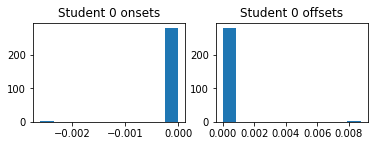

In [ ]:
multiple_hist(onset_dev_list,offset_dev_list," onsets"," offsets",df_all,0)

In [ ]:
index = df_all.index
number_of_rows = len(index)
print(number_of_rows)

k=0
# sonset_deviations,soffset_deviations,
while k<number_of_rows:

   k+=1

16


Onset Grade =  100.0 	 Offset Grade =  100.0


Articulation Grade =  100.0 Sound Q Grade =  100.0 Volume Control Grade =  100.0
Final Mark =  5.0
ok1
0.001696774953690768
ok3


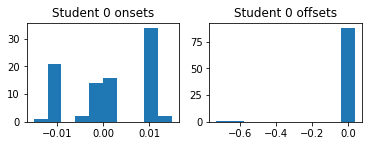

Onset Grade =  76.5 	 Offset Grade =  76.5


Articulation Grade =  63.0 Sound Q Grade =  76.5 Volume Control Grade =  76.5
Final Mark =  3.6
ok1
0.00045170978833962655
ok3


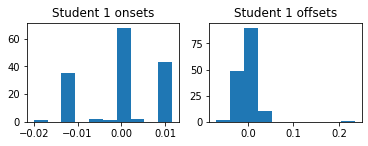

Onset Grade =  49.5 	 Offset Grade =  63.0


Articulation Grade =  63.0 Sound Q Grade =  63.0 Volume Control Grade =  63.0
Final Mark =  2.7
ok1
-0.004134898607495926
ok3


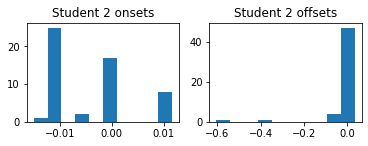

Onset Grade =  63.0 	 Offset Grade =  76.5


Articulation Grade =  76.5 Sound Q Grade =  90.0 Volume Control Grade =  76.5
Final Mark =  3.6
ok1
0.0024878529413662038
ok3


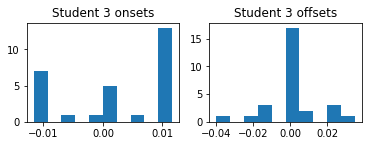

Onset Grade =  63.0 	 Offset Grade =  76.5


Articulation Grade =  76.5 Sound Q Grade =  76.5 Volume Control Grade =  76.5
Final Mark =  3.6
ok1
-0.0014109975023430662
ok3


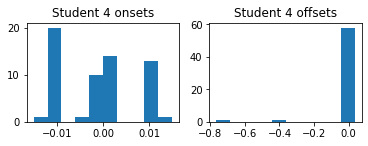

Onset Grade =  76.5 	 Offset Grade =  76.5


Articulation Grade =  63.0 Sound Q Grade =  76.5 Volume Control Grade =  76.5
Final Mark =  2.7
ok1
0.0059037240946234245
ok3


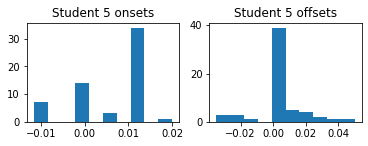

Onset Grade =  68.85 	 Offset Grade =  81.0


Articulation Grade =  81.0 Sound Q Grade =  81.0 Volume Control Grade =  68.85
Final Mark =  3.645
ok1
-0.004182576388486087
ok3


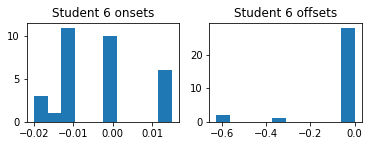

Onset Grade =  76.5 	 Offset Grade =  76.5


Articulation Grade =  76.5 Sound Q Grade =  63.0 Volume Control Grade =  49.5
Final Mark =  1.8
ok1
0.00011702525298829576
ok3


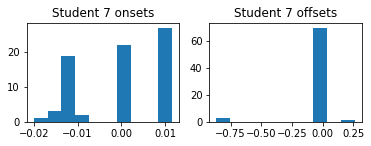

Onset Grade =  49.5 	 Offset Grade =  63.0


Articulation Grade =  76.5 Sound Q Grade =  76.5 Volume Control Grade =  63.0
Final Mark =  2.7
ok1
-0.0008930750819809046
ok3


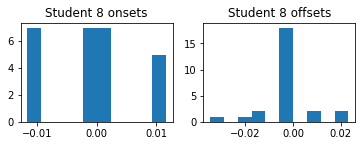

Onset Grade =  49.5 	 Offset Grade =  36.0


Articulation Grade =  36.0 Sound Q Grade =  36.0 Volume Control Grade =  36.0
Final Mark =  0.9
ok1
0.0002546899293445204
ok3


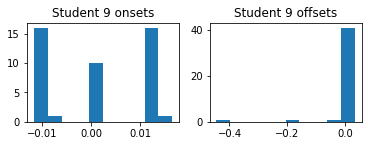

Onset Grade =  49.5 	 Offset Grade =  36.0


Articulation Grade =  36.0 Sound Q Grade =  36.0 Volume Control Grade =  36.0
Final Mark =  0.0
ok1
-0.001295150672840934
ok3


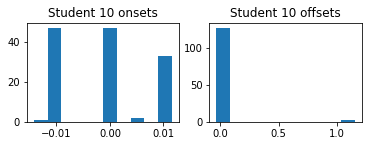

Onset Grade =  76.5 	 Offset Grade =  76.5


Articulation Grade =  90.0 Sound Q Grade =  90.0 Volume Control Grade =  90.0
Final Mark =  3.6
ok1
-0.0015475343900400714
ok3


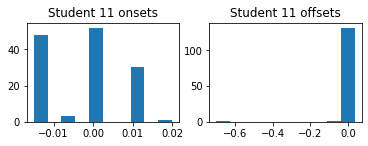

Onset Grade =  63.0 	 Offset Grade =  63.0


Articulation Grade =  63.0 Sound Q Grade =  63.0 Volume Control Grade =  76.5
Final Mark =  2.7
ok1
-0.001395511404157997
ok3


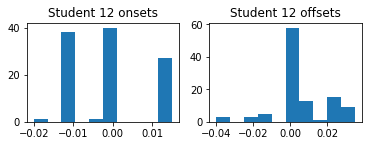

Onset Grade =  76.5 	 Offset Grade =  76.5


Articulation Grade =  76.5 Sound Q Grade =  63.0 Volume Control Grade =  76.5
Final Mark =  3.15
ok1
-0.002930307497891499
ok3


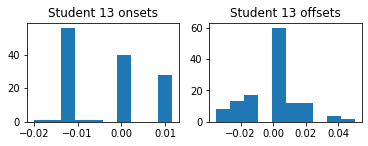

Onset Grade =  90.0 	 Offset Grade =  90.0


Articulation Grade =  90.0 Sound Q Grade =  90.0 Volume Control Grade =  90.0
Final Mark =  4.5
ok1
-0.003379993583613918
ok3


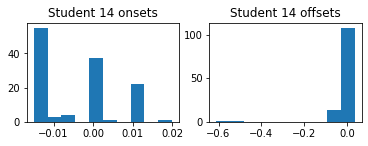

In [ ]:
col_list = ["onset dev", "offset dev"]
sonset_deviations = []
soffset_deviations = []
# sonset_deviations,soffset_deviations
k=0
while k<number_of_rows-1:
   sdeviatePath = 'drive/MyDrive/Bass/deviations/billieJean_iec_student' + str(k+1)+ '.csv'
   sdf = pd.read_csv(sdeviatePath, usecols=col_list)
   sonset_dev_list = sdf["onset dev"]
   sonset_deviations.append(sonset_dev_list)
   soffset_dev_list = sdf["offset dev"] 
   soffset_deviations.append(soffset_dev_list)
   multiple_hist(sonset_dev_list,soffset_dev_list," onsets"," offsets",df_all,k)
   k+=1

In [ ]:
df_all

,Student,precision,recall,f_measure_value,Onset ABS Mean,Onset Mean,Onset Std,Duration ABS Mean,Duration Mean,Duration Std,onsetMark,DurationMark,articulationMark,soundQualityMark,volumeControlMark,finalMark
0,0,1.000,0.98951,0.994728,0.000,0.000,0.000,0.000,0.000,0.000,100.00,100.0,100.0,100.0,100.00,5.000
1,1,0.328,0.31500,0.321000,0.008,0.002,0.009,0.046,-0.017,0.140,76.50,76.5,63.0,76.5,76.50,3.600
2,2,0.519,0.53100,0.525000,0.006,0.000,0.009,0.023,-0.009,0.036,49.50,63.0,63.0,63.0,63.00,2.700
3,3,0.189,0.18500,0.187000,0.008,-0.004,0.009,0.046,-0.031,0.124,63.00,76.5,76.5,90.0,76.50,3.600
4,4,0.102,0.09800,0.100000,0.009,0.002,0.010,0.013,0.001,0.018,63.00,76.5,76.5,76.5,76.50,3.600
5,5,0.206,0.21000,0.208000,0.007,-0.001,0.009,0.040,-0.033,0.133,76.50,76.5,63.0,76.5,76.50,2.700
6,6,0.201,0.20600,0.203000,0.009,0.006,0.010,0.023,0.005,0.026,68.85,81.0,81.0,81.0,68.85,3.645
7,7,0.107,0.10800,0.108000,0.009,-0.004,0.011,0.326,-0.326,0.411,76.50,76.5,76.5,63.0,49.50,1.800
8,8,0.239,0.25900,0.248000,0.008,0.000,0.010,0.149,-0.115,0.326,49.50,63.0,76.5,76.5,63.00,2.700
9,9,0.088,0.09100,0.090000,0.005,-0.001,0.008,0.014,-0.001,0.018,49.50,36.0,36.0,36.0,36.00,0.900


In [ ]:
dataReduced = df_all.drop(labels=[9,10], axis=0)

In [ ]:
print(dataReduced)

    Student  precision  ...  volumeControlMark   finalMark
0         0      1.000  ...             100.00       5.000
1         1      0.328  ...              76.50       3.600
2         2      0.519  ...              63.00       2.700
3         3      0.189  ...              76.50       3.600
4         4      0.102  ...              76.50       3.600
5         5      0.206  ...              76.50       2.700
6         6      0.201  ...              68.85       3.645
7         7      0.107  ...              49.50       1.800
8         8      0.239  ...              63.00       2.700
11       11      0.568  ...              90.00       3.600
12       12      0.525  ...              76.50       2.700
13       13      0.437  ...              76.50       3.150
14       14      0.512  ...              90.00       4.500
15       15      0.468  ...              76.50       1.980

[14 rows x 16 columns]


In [ ]:
import csv  
#onset_X, onset_mean, onset_std, duration_X, duration_mean, duration_std= 
# statisticsGenerator(sonset_deviationsArray,sduration_deviationsArray," onsets", " durations",the_student_grades,sp,sr,sf)

def statisticsGenerator(deviationsArray1,deviationsArray2,title_text1,title_text2,df):
   header = ["Student","precision","recall","f_measure_value","Onset ABS Mean","Onset Mean","Onset Std",
             "Duration ABS Mean","Duration Mean","Duration Std","onsetMark"," DurationMark"," articulationMark ","soundQualityMark","volumeControlMark"," finalMark"]

   studentStatisticsArray= []
   with open('drive/MyDrive/Bass/data/bjean/StudentStatistics_blend_billieJeanscaled2.csv', 'w', encoding='UTF8') as f:
      #dataset = pd.read_csv('drive/MyDrive/Bass/data/bjean/StudentStatistics_blend_billieJeanscaled.csv')


      idx = df.index

      number_of_rows = len(idx)
      print(number_of_rows)
      k=0

      writer = csv.writer(f)
      # write the header
      writer.writerow(header)

      studentStatistics = []
      onset_X = []  # Martis mark
      onset_amean = []
      onset_mean = []
      onset_std= []

      duration_X = [] # Martis mark
      duration_amean = []
      duration_mean = []
      duration_std= []
      list0 = df["onsetMark"].tolist()  
      list1 = df[" DurationMark"].tolist()  
      list2 = df[" articulationMark "].tolist()  
      list3 = df["soundQualityMark"].tolist()  
      list4 = df["volumeControlMark"].tolist()  
      list5 = df[" finalMark"].tolist()  

      listp = df["precision"].tolist()  
      listr = df["recall"].tolist()  
      listf = df["f_measure_value"].tolist()  
  
      for k in range(number_of_rows-1):
          studentStatistics.append(str(k+1))
          student_stats1 = [] # onsets
          student_stats2 = [] # durations

          plt.subplot(2,2,1)
          a = np.array(deviationsArray1[k])
          print(a[0:12])
          onset_m, onset_s = mean(a), sqrt(mean(a*a))
          onset_am= mean(abs(a))
          onset_summary= "Onset ABS  Mean: %f,Onset Mean: %f, Dev. from 0: %f" %(onset_am,onset_m, onset_s)
          title =   "Student " + str(k)+ title_text1

          onset_X.append( list0[k])  # Martis mark
          print("list0[k]")
          print(list0[k])
          onset_mean.append(onset_m)
          onset_amean.append(onset_am)
          onset_std.append(onset_s)

          plt.title(title)
          plt.figure(1, figsize=(9.5, 6))
          plt.hist(a)

          plt.subplot(2,2,2)
          a = np.array(deviationsArray2[k])
          duration_m, duration_s = mean(a), sqrt(mean(a*a))
          duration_am= mean(abs(a))
          duration_summary= "Offset Mean: %f, Dev. from 0: %f" %(duration_m, duration_s)
          title =   "Student " + str(k)+ title_text2
          print(title)
          duration_X.append( list1[k])  # Martis mark
          duration_mean.append(duration_m)
          duration_amean.append(duration_am)
          duration_std.append(duration_s)

          plt.title(title)
          plt.figure(1, figsize=(9.5, 6))
          plt.hist(a)

          plt.show()
          print("Onset Grade = ", list0[k],"\t" ,"Duration Grade = ", list1[k])
          print("\n")
          print(onset_summary)
          print("\n")
          print(duration_summary)
          print("\n")
          print("Articulation Grade = ", list2[k],"Sound Control Grade = ", list3[k], "Volume Control Grade = ", list4[k])
          print("Final Mark = ", list5[k])
          studentStatistics = []
          studentStatistics.append(str(k+1))
          studentStatistics.append(round(listp[k],3))
          print("////////////////////////////")
          print(round(listp[k],3))
          studentStatistics.append(round(listr[k],3))
          studentStatistics.append(round(listf[k],3))
          studentStatistics.append(round(onset_am,3))
          studentStatistics.append(round(onset_m,3))
          studentStatistics.append(round(onset_s,3))   
          studentStatistics.append(round(duration_am,3))                   
          studentStatistics.append(round(duration_m,3)) 
          studentStatistics.append(round(duration_s,3))   
          studentStatistics.append(list0[k])
          studentStatistics.append(list1[k])
          studentStatistics.append(list2[k])
          studentStatistics.append(list3[k])
          studentStatistics.append(list4[k])
          studentStatistics.append(list5[k])
          # write the data
          writer.writerow(studentStatistics)
          studentStatisticsArray.append(studentStatistics)
    
   return(onset_X, onset_mean, onset_std, duration_X, duration_mean, duration_std,studentStatisticsArray,onset_amean, duration_amean)
# Capture a table of onset and grade


16
[ 1.16099770e-02 -4.92063457e-09  1.16099782e-02  1.16099814e-02
  1.16099723e-02  3.46938833e-09  1.16099786e-02 -1.16099745e-02
  1.16099744e-02  1.16099738e-02  1.16099823e-02  5.66892311e-10]
list0[k]
100.0
Student 0 offset


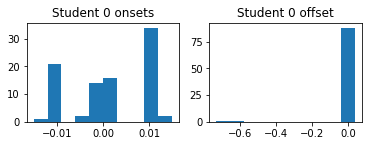

Onset Grade =  100.0 	 Duration Grade =  100.0


Onset ABS  Mean: 0.007670,Onset Mean: 0.001697, Dev. from 0: 0.009469


Offset Mean: -0.009288, Dev. from 0: 0.104282


Articulation Grade =  100.0 Sound Control Grade =  100.0 Volume Control Grade =  100.0
Final Mark =  5.0
////////////////////////////
1.0
[ 1.16099773e-02  1.16099772e-02  1.16099770e-02  1.16099777e-02
  1.16099774e-02 -1.79138482e-10  1.16099773e-02 -2.90247826e-10
 -1.16099777e-02  1.16099775e-02  1.97278993e-09 -1.16099765e-02]
list0[k]
76.5
Student 1 offset


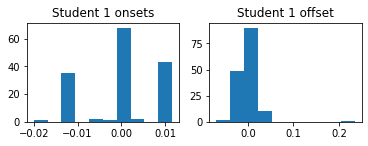

Onset Grade =  76.5 	 Duration Grade =  76.5


Onset ABS  Mean: 0.006227,Onset Mean: 0.000452, Dev. from 0: 0.008501


Offset Mean: -0.004701, Dev. from 0: 0.026344


Articulation Grade =  63.0 Sound Control Grade =  76.5 Volume Control Grade =  76.5
Final Mark =  3.6
////////////////////////////
0.328
[-4.60318006e-10  1.16099771e-02 -1.13378640e-10 -1.16099777e-02
  1.16099775e-02 -4.14965839e-10  4.73923123e-10  3.85487198e-11
 -1.16099775e-02 -1.16099774e-02  1.16099772e-02  1.16099775e-02]
list0[k]
49.5
Student 2 offset


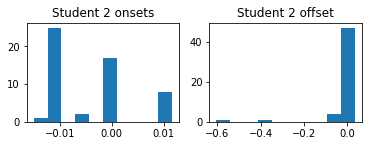

Onset Grade =  49.5 	 Duration Grade =  63.0


Onset ABS  Mean: 0.007640,Onset Mean: -0.004135, Dev. from 0: 0.009370


Offset Mean: -0.020593, Dev. from 0: 0.100766


Articulation Grade =  63.0 Sound Control Grade =  63.0 Volume Control Grade =  63.0
Final Mark =  2.7
////////////////////////////
0.519
[ 1.16099813e-02  4.03628064e-09  1.16099776e-02  1.16099796e-02
  1.90475902e-09  1.16099770e-02  1.16099786e-02  2.85714208e-09
 -3.56009267e-09  1.16099780e-02  1.16099796e-02 -1.16099820e-02]
list0[k]
63.0
Student 3 offset


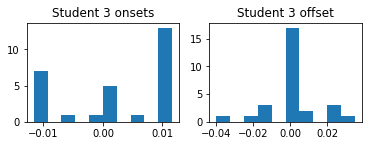

Onset Grade =  63.0 	 Duration Grade =  76.5


Onset ABS  Mean: 0.008650,Onset Mean: 0.002488, Dev. from 0: 0.009903


Offset Mean: 0.000823, Dev. from 0: 0.014058


Articulation Grade =  76.5 Sound Control Grade =  90.0 Volume Control Grade =  76.5
Final Mark =  3.6
////////////////////////////
0.189
[ 1.16099774e-02 -1.56461510e-10  1.16099724e-02 -1.16099765e-02
 -1.16099780e-02 -1.16099795e-02 -6.57596644e-10  1.16099751e-02
 -1.76870785e-09 -1.16099802e-02 -4.42176784e-09  1.16099745e-02]
list0[k]
63.0
Student 4 offset


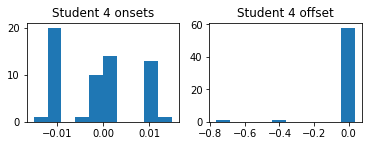

Onset Grade =  63.0 	 Duration Grade =  76.5


Onset ABS  Mean: 0.006942,Onset Mean: -0.001411, Dev. from 0: 0.009026


Offset Mean: -0.023292, Dev. from 0: 0.112917


Articulation Grade =  76.5 Sound Control Grade =  76.5 Volume Control Grade =  76.5
Final Mark =  3.6
////////////////////////////
0.102
[ 1.16099778e-02  1.16099769e-02 -1.76870785e-09  1.16099744e-02
 -1.16099781e-02  1.16099801e-02  1.16099768e-02 -4.67120032e-09
  1.16099758e-02  2.00000000e-02  5.00000000e-03  5.00000000e-03]
list0[k]
76.5
Student 5 offset


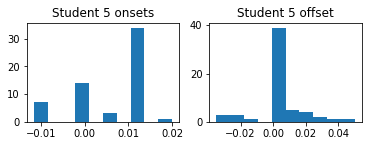

Onset Grade =  76.5 	 Duration Grade =  76.5


Onset ABS  Mean: 0.008659,Onset Mean: 0.005904, Dev. from 0: 0.010084


Offset Mean: 0.001864, Dev. from 0: 0.015258


Articulation Grade =  63.0 Sound Control Grade =  76.5 Volume Control Grade =  76.5
Final Mark =  2.7
////////////////////////////
0.206
[-1.16099775e-02 -1.16099769e-02 -6.57596644e-10  1.16099761e-02
  1.16099807e-02 -1.16099791e-02  1.16099759e-02  4.89795582e-09
  3.83219856e-09  1.16099781e-02  1.13381304e-10 -1.16099803e-02]
list0[k]
68.85
Student 6 offset


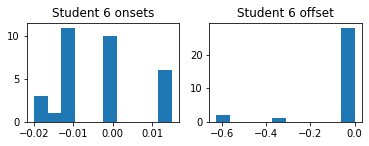

Onset Grade =  68.85 	 Duration Grade =  81.0


Onset ABS  Mean: 0.008895,Onset Mean: -0.004183, Dev. from 0: 0.011081


Offset Mean: -0.052581, Dev. from 0: 0.165252


Articulation Grade =  81.0 Sound Control Grade =  81.0 Volume Control Grade =  68.85
Final Mark =  3.645
////////////////////////////
0.201
[-1.16099769e-02 -4.60318006e-10  1.16099773e-02  1.16099770e-02
 -1.16099770e-02 -3.92289756e-10  1.16099771e-02 -3.74148712e-10
  1.16099809e-02  1.16099744e-02 -4.42176784e-09  1.16099798e-02]
list0[k]
76.5
Student 7 offset


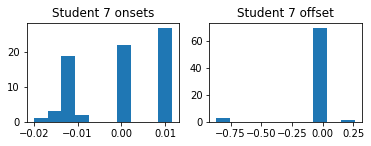

Onset Grade =  76.5 	 Duration Grade =  76.5


Onset ABS  Mean: 0.008355,Onset Mean: 0.000117, Dev. from 0: 0.010035


Offset Mean: -0.032652, Dev. from 0: 0.173820


Articulation Grade =  76.5 Sound Control Grade =  63.0 Volume Control Grade =  49.5
Final Mark =  1.8
////////////////////////////
0.107
[-1.16099817e-02  1.16099761e-02 -4.98866015e-09 -1.16099740e-02
  4.89795582e-09 -1.16099766e-02 -4.62584993e-09  4.96598318e-09
  1.17913856e-09  2.76643775e-09 -1.45124801e-09 -1.42857104e-09]
list0[k]
49.5
Student 8 offset


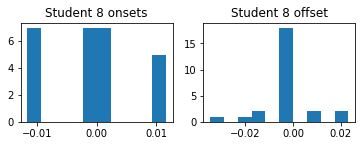

Onset Grade =  49.5 	 Duration Grade =  63.0


Onset ABS  Mean: 0.005358,Onset Mean: -0.000893, Dev. from 0: 0.007887


Offset Mean: -0.000447, Dev. from 0: 0.011385


Articulation Grade =  76.5 Sound Control Grade =  76.5 Volume Control Grade =  63.0
Final Mark =  2.7
////////////////////////////
0.239
[-1.16099777e-02  1.16099770e-02  1.16099724e-02 -1.16099765e-02
 -2.22222241e-09  1.16099756e-02  4.01360545e-09  1.16099744e-02
  1.16099745e-02 -1.16099771e-02 -1.16099813e-02  1.16099803e-02]
list0[k]
49.5
Student 9 offset


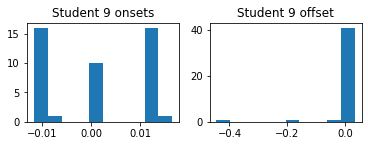

Onset Grade =  49.5 	 Duration Grade =  36.0


Onset ABS  Mean: 0.008937,Onset Mean: 0.000255, Dev. from 0: 0.010221


Offset Mean: -0.010056, Dev. from 0: 0.072526


Articulation Grade =  36.0 Sound Control Grade =  36.0 Volume Control Grade =  36.0
Final Mark =  0.9
////////////////////////////
0.088
[ 1.16099778e-02  1.16099771e-02 -1.16099774e-02 -1.16099772e-02
  1.16099769e-02  1.16099778e-02 -1.16099773e-02 -1.16099776e-02
 -1.56461510e-10  1.97278993e-09  1.16099782e-02  1.16099766e-02]
list0[k]
49.5
Student 10 offset


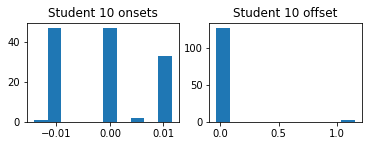

Onset Grade =  49.5 	 Duration Grade =  36.0


Onset ABS  Mean: 0.007294,Onset Mean: -0.001295, Dev. from 0: 0.009170


Offset Mean: 0.018443, Dev. from 0: 0.141375


Articulation Grade =  36.0 Sound Control Grade =  36.0 Volume Control Grade =  36.0
Final Mark =  0.0
////////////////////////////
0.18
[ 4.33106884e-10 -1.16099778e-02  1.16099771e-02 -1.13378640e-10
  1.16099769e-02  3.85487198e-11 -1.79138482e-10 -1.16099774e-02
 -1.56461510e-10  1.16099777e-02 -1.16099754e-02 -4.92063457e-09]
list0[k]
76.5
Student 11 offset


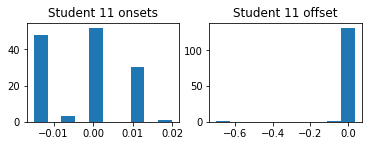

Onset Grade =  76.5 	 Duration Grade =  76.5


Onset ABS  Mean: 0.007045,Onset Mean: -0.001548, Dev. from 0: 0.009093


Offset Mean: -0.003419, Dev. from 0: 0.062819


Articulation Grade =  90.0 Sound Control Grade =  90.0 Volume Control Grade =  90.0
Final Mark =  3.6
////////////////////////////
0.568
[ 4.33106884e-10  1.16099769e-02 -1.16099773e-02  1.16099771e-02
 -1.13378640e-10 -4.14965839e-10  4.73923123e-10  3.85487198e-11
  1.16099771e-02 -1.16099774e-02 -1.16099769e-02 -1.16099822e-02]
list0[k]
63.0
Student 12 offset


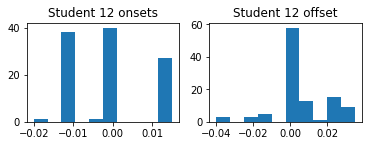

Onset Grade =  63.0 	 Duration Grade =  63.0


Onset ABS  Mean: 0.007318,Onset Mean: -0.001396, Dev. from 0: 0.009311


Offset Mean: 0.005547, Dev. from 0: 0.015933


Articulation Grade =  63.0 Sound Control Grade =  63.0 Volume Control Grade =  76.5
Final Mark =  2.7
////////////////////////////
0.525
[-2.26751951e-12 -1.16099775e-02 -1.16099777e-02  4.73923123e-10
 -3.92289756e-10 -1.16099773e-02  4.08162393e-10 -6.80273615e-10
 -2.22222241e-09  1.16099751e-02 -4.42176784e-09 -1.16099817e-02]
list0[k]
76.5
Student 13 offset


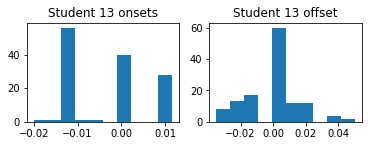

Onset Grade =  76.5 	 Duration Grade =  76.5


Onset ABS  Mean: 0.008010,Onset Mean: -0.002930, Dev. from 0: 0.009712


Offset Mean: -0.001009, Dev. from 0: 0.016912


Articulation Grade =  76.5 Sound Control Grade =  63.0 Volume Control Grade =  76.5
Final Mark =  3.15
////////////////////////////
0.437
[ 1.16099778e-02 -4.60318006e-10 -1.16099775e-02 -1.16099773e-02
 -1.16099775e-02 -1.56461510e-10 -1.16099769e-02 -1.16099771e-02
 -1.16099765e-02 -1.16099795e-02 -1.16099780e-02  2.99319680e-09]
list0[k]
90.0
Student 14 offset


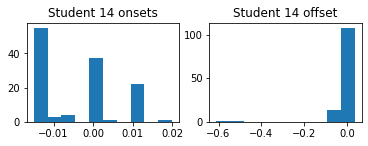

Onset Grade =  90.0 	 Duration Grade =  90.0


Onset ABS  Mean: 0.007913,Onset Mean: -0.003380, Dev. from 0: 0.009596


Offset Mean: -0.012752, Dev. from 0: 0.075069


Articulation Grade =  90.0 Sound Control Grade =  90.0 Volume Control Grade =  90.0
Final Mark =  4.5
////////////////////////////
0.512


In [ ]:
onset_X, onset_mean, onset_std, duration_X, duration_mean, duration_std,stats, onset_amean, duration_amean= statisticsGenerator(sonset_deviations,soffset_deviations," onsets", " offset",df_all)

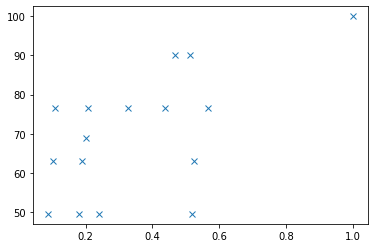

[100.0, 76.5, 49.5, 63.0, 63.0, 76.5, 68.85, 76.5, 49.5, 49.5, 49.5, 76.5, 63.0, 76.5, 90.0, 90.0]


In [ ]:
onset_mean_list = df_all["Onset Mean"].tolist()   
onset_amean_list = df_all["Onset ABS Mean"].tolist()   
onset_grade_list = df_all["onsetMark"].tolist()   
onset_precision_list = df_all["precision"].tolist()   

plt.plot(onset_precision_list,onset_grade_list, 'x')
plt.show()

Duration_mean_list = df_all["Duration Mean"].tolist()   
Duration_amean_list = df_all["Duration ABS Mean"].tolist()   
Duration_grade_list = df_all[" DurationMark"].tolist()   
print(onset_grade_list)




# I should try to plot Precision against  ONSET_GRADE(Y) vs PRECISION (X)
# I should try to plot Precision against  ONSET_GRADE(Y) vs ABSOLUTE MEAN (X)
# TRY TO EXPLAIN
#onset_X, onset_mean, onset_std, duration_X, duration_mean, duration_std,stats, onset_amean, duration_amean= 
#statisticsGenerator(sonset_deviations,soffset_deviations," onsets", " offset",df_all)

In [ ]:
import pandas as pd
#sonset_deviations,soffset_deviations

Onset Grade =  100.0 	 Offset Grade =  100.0


Articulation Grade =  100.0 Sound Q Grade =  100.0 Volume Control Grade =  100.0
Final Mark =  5.0
ok1
-9.2224652212578e-06
ok3


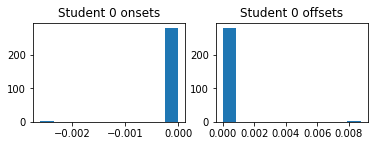

In [ ]:
deviatePath = 'drive/MyDrive/Bass/deviations/billieJean_iec_stem.csv'
dff = pd.read_csv(deviatePath, usecols=col_list)
onset_dev_list = dff["onset dev"]

offset_dev_list = dff["offset dev"] 
multiple_hist(onset_dev_list,offset_dev_list," onsets"," offsets",df_all,0)

In [ ]:
data_timing_onset0= { 'onsets0' :sonset_deviations[0]}
df = pd.DataFrame(data_timing_onset0,columns=['onsets0'])
fig = px.histogram(df, x="onsets0")
fig.show()

In [ ]:

data_timing_duration0= { 'durations0' :soffset_deviations[0]}
df = pd.DataFrame(data_timing_duration0,columns=['durations0'])
fig = px.histogram(df, x="durations0")
fig.show()

In [ ]:
dataset = pd.read_csv('drive/MyDrive/Bass/data/bjean/StudentStatistics_blend_billieJeanscaled.csv')
#dataset = pd.read_csv('drive/MyDrive/Bass/data/StudentStatisticsBillie.csv')


In [ ]:
dataset

,Student,precision,recall,f_measure_value,Onset ABS Mean,Onset Mean,Onset Std,Duration ABS Mean,Duration Mean,Duration Std,onsetMark,DurationMark,articulationMark,soundQualityMark,volumeControlMark,finalMark,DurAcc
0,0,1.000,0.98951,0.994728,0.000,0.000,0.000,0.000,0.000,0.000,100.00,100.0,100.0,100.0,100.00,5.000,1.000000
1,1,0.328,0.31500,0.321000,0.008,0.002,0.009,0.046,-0.017,0.140,76.50,76.5,63.0,76.5,76.50,3.600,0.478261
2,2,0.519,0.53100,0.525000,0.006,0.000,0.009,0.023,-0.009,0.036,49.50,63.0,63.0,63.0,63.00,2.700,0.571429
3,3,0.189,0.18500,0.187000,0.008,-0.004,0.009,0.046,-0.031,0.124,63.00,76.5,76.5,90.0,76.50,3.600,0.478261
4,4,0.102,0.09800,0.100000,0.009,0.002,0.010,0.013,0.001,0.018,63.00,76.5,76.5,76.5,76.50,3.600,0.333333
5,5,0.206,0.21000,0.208000,0.007,-0.001,0.009,0.040,-0.033,0.133,76.50,76.5,63.0,76.5,76.50,2.700,0.391304
6,6,0.201,0.20600,0.203000,0.009,0.006,0.010,0.023,0.005,0.026,68.85,81.0,81.0,81.0,68.85,3.645,0.681818
7,7,0.107,0.10800,0.108000,0.009,-0.004,0.011,0.326,-0.326,0.411,76.50,76.5,76.5,63.0,49.50,1.800,0.695652
8,8,0.239,0.25900,0.248000,0.008,0.000,0.010,0.149,-0.115,0.326,49.50,63.0,76.5,76.5,63.00,2.700,0.652174
9,9,0.088,0.09100,0.090000,0.005,-0.001,0.008,0.014,-0.001,0.018,49.50,36.0,36.0,36.0,36.00,0.900,0.937500


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
#X = dataset[['P', 'R', 'F',  ' ABS Mean Onset','Mean  Onset','Std Onset',' ABS Mean Duration','Mean Duration','Std Duration']]
#X = dataset[['precision', 'recall', 'f_measure_value',  'Onset ABS Mean','Onset Mean','Onset Std']]
#X = dataset[['precision','recall','f_measure_value']]#,'Onset Mean','Onset Std']]
X = dataset[['precision','recall','f_measure_value']]#,]]



y=array(dataset['onsetMark'])


#coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# IEC PRF Mean Absolute Error: 12.079847760757067
# IEC PRF Root Mean Squared Error: 12.521853181718802

      Actual  Predicted
0  76.500000  68.763970
1  68.849998  55.128501
2  49.500000  42.868460
3  49.500000  63.165241
4  76.500000  78.933811
Mean Absolute Error: 8.837623946566007
Root Mean Squared Error: 9.846473827173016


In [ ]:
dataset

,Student,precision,recall,f_measure_value,Onset ABS Mean,Onset Mean,Onset Std,Duration ABS Mean,Duration Mean,Duration Std,onsetMark,DurationMark,articulationMark,soundQualityMark,volumeControlMark,finalMark,DurAcc
0,0,1.000,0.98951,0.994728,0.000,0.000,0.000,0.000,0.000,0.000,100.00,100.0,100.0,100.0,100.00,5.000,1.000000
1,1,0.328,0.31500,0.321000,0.008,0.002,0.009,0.046,-0.017,0.140,76.50,76.5,63.0,76.5,76.50,3.600,0.478261
2,2,0.519,0.53100,0.525000,0.006,0.000,0.009,0.023,-0.009,0.036,49.50,63.0,63.0,63.0,63.00,2.700,0.571429
3,3,0.189,0.18500,0.187000,0.008,-0.004,0.009,0.046,-0.031,0.124,63.00,76.5,76.5,90.0,76.50,3.600,0.478261
4,4,0.102,0.09800,0.100000,0.009,0.002,0.010,0.013,0.001,0.018,63.00,76.5,76.5,76.5,76.50,3.600,0.333333
5,5,0.206,0.21000,0.208000,0.007,-0.001,0.009,0.040,-0.033,0.133,76.50,76.5,63.0,76.5,76.50,2.700,0.391304
6,6,0.201,0.20600,0.203000,0.009,0.006,0.010,0.023,0.005,0.026,68.85,81.0,81.0,81.0,68.85,3.645,0.681818
7,7,0.107,0.10800,0.108000,0.009,-0.004,0.011,0.326,-0.326,0.411,76.50,76.5,76.5,63.0,49.50,1.800,0.695652
8,8,0.239,0.25900,0.248000,0.008,0.000,0.010,0.149,-0.115,0.326,49.50,63.0,76.5,76.5,63.00,2.700,0.652174
9,9,0.088,0.09100,0.090000,0.005,-0.001,0.008,0.014,-0.001,0.018,49.50,36.0,36.0,36.0,36.00,0.900,0.937500


In [ ]:
#X = dataset[['precision','recall','f_measure_value','Duration ABS Mean','Duration Mean','Duration Std']]
X = dataReduced[['precision','recall','f_measure_value','Duration ABS Mean']]
y=array(dataReduced[' DurationMark'])


#coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)# of you ommit it will be random
# related to the seed in random function
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


   Actual  Predicted
0    63.0  91.644456
1    81.0  77.683058
2    76.5  67.346522
3    76.5  69.271176
4    63.0  89.156001
Mean Absolute Error: 14.899940271989365
Root Mean Squared Error: 18.17517767699495


In [ ]:
dataset.head()

,Student,precision,recall,f_measure_value,Onset ABS Mean,Onset Mean,Onset Std,Duration ABS Mean,Duration Mean,Duration Std,onsetMark,DurationMark,articulationMark,soundQualityMark,volumeControlMark,finalMark,DurAcc
0,0,1.000,0.98951,0.994728,0.000,0.000,0.000,0.000,0.000,0.000,100.0,100.0,100.0,100.0,100.0,5.0,1.000000
1,1,0.328,0.31500,0.321000,0.008,0.002,0.009,0.046,-0.017,0.140,76.5,76.5,63.0,76.5,76.5,3.6,0.478261
2,2,0.519,0.53100,0.525000,0.006,0.000,0.009,0.023,-0.009,0.036,49.5,63.0,63.0,63.0,63.0,2.7,0.571429
3,3,0.189,0.18500,0.187000,0.008,-0.004,0.009,0.046,-0.031,0.124,63.0,76.5,76.5,90.0,76.5,3.6,0.478261
4,4,0.102,0.09800,0.100000,0.009,0.002,0.010,0.013,0.001,0.018,63.0,76.5,76.5,76.5,76.5,3.6,0.333333


In [ ]:
X = dataset[['precision','recall','f_measure_value','Onset ABS Mean','Duration ABS Mean']]
y=array(dataset[' finalMark'])


#coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

   Actual  Predicted
0   3.600   2.458553
1   3.645   1.818748
2   2.700   1.369066
3   0.900   4.263822
4   3.150   3.510796
Mean Absolute Error: 1.6046503464557524
Root Mean Squared Error: 1.8897068035637983


In [ ]:
 	#Student, precision, recall, f_measure_value,Onset ABS Mean,Onset Mean,Onset Std,Duration ABS Mean,Duration Mean,Duration Std,
  #onsetMark, DurationMark, articulationMark, soundQualityMark, volumeControlMark, finalMark, DurAcc

In [ ]:
X = dataset[['precision','recall','f_measure_value','Duration Mean','Onset Mean']]
y=array(dataset[' articulationMark '])


#coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

   Actual  Predicted
0    63.0  67.723573
1    81.0  61.580665
2    76.5  70.486409
3    36.0  55.916098
4    76.5  73.553451
Mean Absolute Error: 10.603828832886387
Root Mean Squared Error: 12.9685701857993


In [ ]:
X = dataset[['precision','recall','f_measure_value']]
y=array(dataset['volumeControlMark'])


#coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

      Actual  Predicted
0  76.500000  69.630311
1  68.849998  62.303547
2  63.000000  61.664045
3  36.000000  58.703050
4  76.500000  78.595485
Mean Absolute Error: 7.910126198272835
Root Mean Squared Error: 11.060316173476492


In [ ]:
X = dataset[['precision','recall','f_measure_value']]
y=array(dataset['soundQualityMark'])


#coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

   Actual  Predicted
0    76.5  71.536513
1    81.0  69.491381
2    76.5  73.583121
3    36.0  63.163788
4    63.0  74.703051
Mean Absolute Error: 11.651164639019797
Root Mean Squared Error: 14.425154835580537
